# Анализ оттока клиентов «Метанпромбанка»

## Описание проекта

Проект направлен на анализ оттока клиентов Метанпромбанка для разработки мер по его снижению. Планируется провести анализ данных, выявить факторы оттока, сегментировать клиентов и разработать рекомендации по удержанию.

### Цель проекта

- Выделение сегментов с наибольшим оттоком клиентов
- Составление рекомендаций по работе с нелояльными клиентами

### Описание данных

- USERID — идентификатор пользователя;
- score — баллы кредитного скоринга;
- city — город;
- gender — пол;
- age — возраст;
- equity — количество баллов собственности;
- balance — баланс на счёте;
- products — количество продуктов, которыми пользуется клиент;
- credit_card — есть ли кредитная карта, 1-да, 0-нет;
- last_activity — активный клиент, 1-да, 0-нет;
- EST_SALARY — заработная плата клиента;
- сhurn — признак оттока, 1-ушёл, 0-нет.

## План работы:

### Загрузка и просмотр данных

### Предобраотка данных

- Приведения наименования столбцов к нижнему регистру
- Поиск и обработка пропусков
- Поиск и обработка явных дубликатов
- Поиск и обработка неявных дубликатов
- Проверка аномальных значений

###  Исследовательский анализ данных

- Анализ распределения признаков
- Исследование непрерывных и дискретных показателей
- Построение корреляционных матриц
- Визуализация ключевых метрик
- Составление портрета “ушедшего клиента”
- Выявление паттернов поведения
- Формулировка выводов

### Формулировка гипотез

- Определение 2-3 ключевых гипотез
- Выбор методов проверки
- Проведение статистического анализа
- Проверка значимости результатов
- Формулировка выводов

### Формулировка предварительных выводов

- Формулировка предварительных выводов по итогам EDA и проверки выдвинутых гипотез

### Сегментация

- Анализ факторов оттока
- Выделение ключевых признаков
- Определение взаимосвязей
- Ранжирование факторов по влиянию
- Формирование сегментов
- Приоритизация сегментов
- Описание характеристик каждого сегмента

### Выводы и рекомендации

- Обобщение выводов исследования
- Формулировка рекомендаций по итогам исследования

### Подготовка презентации

- Подготовка презентации

## Основной проект

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
import math as mth
import numpy as np

from scipy import stats
from scipy.stats import ttest_ind, levene, shapiro, mannwhitneyu

import sys
!"{sys.executable}" -m pip install phik
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
from scipy.stats import zscore

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 80    
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set(rc={'figure.figsize':(15,10)})

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
df.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
5,202305,856.00,Рыбинск,М,56.00,4,"863,687.24",3,1,0,"156,619.80",0
6,177259,807.00,Ярославль,Ж,39.00,3,"405,042.44",3,0,1,"103,838.32",0
7,218868,825.00,Ярославль,Ж,38.00,4,"458,145.40",2,1,1,"68,085.48",0
8,211686,923.00,Ярославль,М,54.00,5,"1,206,337.87",2,1,0,"155,371.79",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0


#### Промежуточный вывод:

Данные загружены, в данных есть пропуски. Обработаем их далее. 

### Предобработка данных

In [6]:
x = len(df) #зафиксируем длину изначального датафрейма

#### Приведения наименования столбцов к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()
df = df.rename(columns = {'userid':'user_id'})
df.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0


Наименования столбцов датасета приведены к нижнему регистру.

#### Поиск и обработка пропусков

In [8]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Проверим пропуски на тип ошибки:

In [9]:
df_test = df.drop('user_id', axis=1)

def analyze_missing_data(df, column, interval_cols):
    # Создаем индикаторную переменную
    df['is_missing'] = df[column].isna().astype(int)

    phik_matrix = df.drop(column, axis=1).phik_matrix(interval_cols=interval_cols).round(2)
    
    # Настройка тепловой карты
    plt.figure(figsize=(15, 10))
    mask = np.triu(np.ones_like(phik_matrix, dtype=bool))
    sns.heatmap(
        phik_matrix,
        annot=True,
        mask=mask,
        cmap="coolwarm",
        vmin=0, vmax=1,
        linewidths=.5,
        square=True
    )
    plt.title(f'Phi_K корреляции с пропущенными значениями в {column}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print(f"Phi_K корреляции с пропущенными значениями в {column}:")
    print(phik_matrix['is_missing'])
    
    # Определяем тип пропусков по phik-корреляции
    max_phik = abs(phik_matrix['is_missing'].drop('is_missing')).max()
    if max_phik < 0.3:
        print("Тип пропусков: MCAR (случайные)")
    elif 0.3 <= max_phik < 0.7:
        print("Тип пропусков: MAR (случайные в группах)")
    else:
        print("Тип пропусков: MNAR (неслучайные)")
    
    df.drop('is_missing', axis=1, inplace=True)


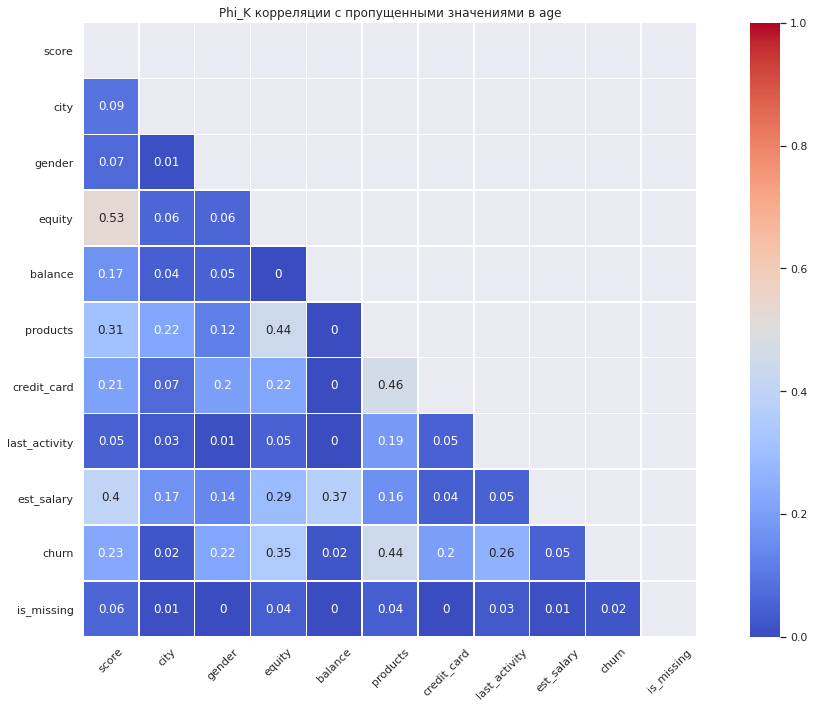

Phi_K корреляции с пропущенными значениями в age:
score           0.06
city            0.01
gender          0.00
equity          0.04
balance         0.00
products        0.04
credit_card     0.00
last_activity   0.03
est_salary      0.01
churn           0.02
is_missing      1.00
Name: is_missing, dtype: float64
Тип пропусков: MCAR (случайные)


In [10]:
analyze_missing_data(df_test, 'age', interval_cols=['score','balance','est_salary','age'])

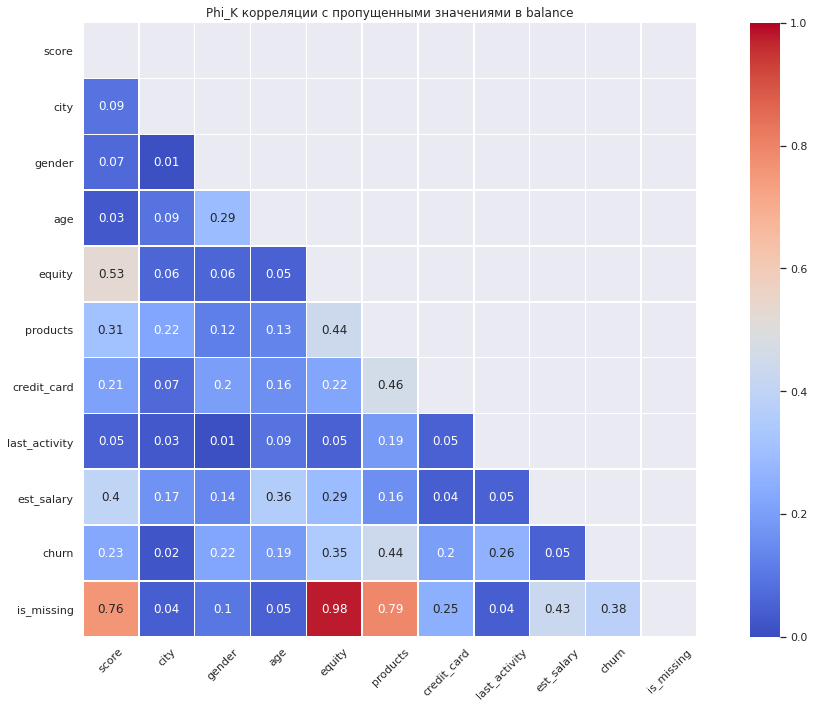

Phi_K корреляции с пропущенными значениями в balance:
score           0.76
city            0.04
gender          0.10
age             0.05
equity          0.98
products        0.79
credit_card     0.25
last_activity   0.04
est_salary      0.43
churn           0.38
is_missing      1.00
Name: is_missing, dtype: float64
Тип пропусков: MNAR (неслучайные)


In [11]:
analyze_missing_data(df_test, 'balance', interval_cols=['score','balance','est_salary','age'])

In [12]:
df['age'].unique()

array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., nan, 83., 82.,
       81., 84., 79., 86.])

Возраст - один из важных параметров для определения категорий клиентов. Удалим данные с пропускаи в данном параметре. Скорее всего пропуски в данном параметре по случайности. Также мы определили, что дынные пропуски случайны, поэтому удалим данные строки. 

In [13]:
df = df.dropna(subset=['age'])

In [14]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Приведем возраст и кредитный рейтинг к формату int.

In [15]:
df = df.astype({'age': int, 'score': int})

In [16]:
len(df)/x

0.9974

**Удалено менее 1% выборки.**

Пропуски в параметре **balance** относится к категории пропусков **MNAR**. Пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям. Пока что оставим данные пропуски без изменения.

In [17]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1013.0+ KB


In [19]:
df = df.reset_index(drop=True)

**Пропуски удалены или оставлены без изменений на данном этапе исследования.**

#### Поиск и обработка явных дубликатов

In [20]:
df.duplicated().sum()

0

**Явные дубликаты не обнаружены**

#### Поиск и обработка неявных дубликатов

Проверим на неявные дубликаты по параметру user_id.

In [21]:
df['user_id'].value_counts()

120258    2
217643    2
199312    2
170312    2
200863    2
         ..
181682    1
179637    1
173494    1
175543    1
215039    1
Name: user_id, Length: 9924, dtype: int64

In [22]:
df['user_id'].duplicated().sum()

50

Проверим, могут ли быть клиенты банка с одинаковым id в разных городах.


In [23]:
df.duplicated(subset=['user_id', 'city']).sum()

0

In [24]:
duplicates = df[df['user_id'].duplicated(keep=False)].sort_values(by='user_id', ascending=False)

In [25]:
duplicates

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8481,227795,839,Ярославль,М,34,2,"326,593.14",2,1,0,"103,314.92",0
8192,227795,840,Рыбинск,М,34,2,"350,768.03",1,1,0,"102,036.14",1
4212,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,"138,582.58",0
2594,226719,990,Ярославль,М,37,4,"14,648,692.14",2,0,0,"934,412.61",1
2300,220816,934,Рыбинск,Ж,74,5,"1,294,285.39",3,1,0,"95,606.80",0
...,...,...,...,...,...,...,...,...,...,...,...,...
5889,120258,905,Ярославль,М,30,0,NaN,1,1,1,"146,427.96",0
4862,117943,855,Рыбинск,Ж,32,6,"1,036,832.93",4,1,1,"107,792.71",1
7531,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.93",0
1892,116540,883,Рыбинск,Ж,55,1,"362,756.49",3,0,1,"175,920.48",1


In [26]:
df.duplicated(subset=['user_id', 'gender']).sum()

18

**Промежуточный вывод:** как мы видим из таблицы дубликатов по user_id одинаковый id может быть у клиентов в разных городах, при этом это - разные люди: 18 раз id дублировался у клиентов с разным полом, из-за чего нельзя утверждать, что id присвоен одному человеку в отделениях банка в разных городах. 

#### Поиск аномальных значений

In [27]:
df.drop('user_id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
score,"9,974.00",848.68,65.40,642.00,802.00,853.00,900.00,"1,000.00"
age,"9,974.00",42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,"9,974.00",2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,"7,695.00","827,245.59","1,980,327.41",0.00,"295,698.71","524,295.33","980,051.21","119,113,552.01"
products,"9,974.00",1.87,0.79,0.00,1.00,2.00,2.00,5.00
credit_card,"9,974.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,"9,974.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,"9,974.00","147,786.81","139,285.51","2,546.30","75,251.66","119,626.79","174,499.81","1,395,064.45"
churn,"9,974.00",0.18,0.39,0.00,0.00,0.00,0.00,1.00


**Промежуточный вывод:** как мы видим, параметры, особенно которые обозначают денежные массы, имеют выбросы. На данном этапе ислледования, данные значения не будут обработы, при необходимости будут отсортированы по ходу исследования.

#### *Вывод* по преобработке данных:

- Наименования столбцов датасета приведены к нижнему регистру, параметр user_id приведен к более читаемому формату.
- Проверены параметры пропусков на тип пропусков. 
- Удалены пропуски в параметре age, в параметре balance - оставили без изменений, тк тип пропуска MNAR.
- Явные дубликаты не обнаружены. 
- Обнаружены неявные дубликаты по параметру user_id, данные дубликаты не обрабатывались, тк могут быть особенностью заполнения внутренней системы и могут обозначають разных людей. 
- Обнаружены аномальные значения, но на данном этапе не обрабатывались, при необходимости будут отсортированы по ходу исследования. 

### Исследовательский анализ данных

#### Анализ распределения признаков

In [28]:
df['churn'].value_counts()

0    8155
1    1819
Name: churn, dtype: int64

In [29]:
df_kde = df.drop('user_id', axis=1)


Рассмотрим медианные показатели параметров, чтобы избежать влияния выбросов.

In [30]:
df_eda = df_kde.groupby('churn').median()
df_eda.T

churn,0,1
score,848.00,866.00
age,40.00,39.00
equity,3.00,4.00
balance,"475,410.09","783,908.90"
products,2.00,2.00
credit_card,1.00,1.00
last_activity,0.00,1.00
est_salary,"118,227.60","125,395.22"


##### Промежуточный вывод по медианным значениям:: 

- Количество банковских продуктов (products) и наличие кредитной карты не влияют на отток клиентов
- У ушедших клиентов баланс и ожидаемая зарплата (balance и est_salary) выше, чем у тех, кто остается. 
- Ушедшие клиенты немного моложе, чем оставшиеся. 
- Кредитный рейтинг ушедших клиентов выше, чем 
- Наблюдаем интересный тренд, что клиент с большей вероятностью уходит, если был активен в последнее время.

Построим графики распределения признаков:

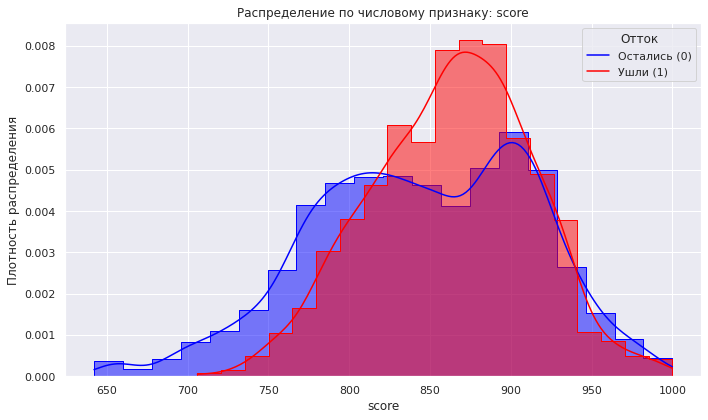

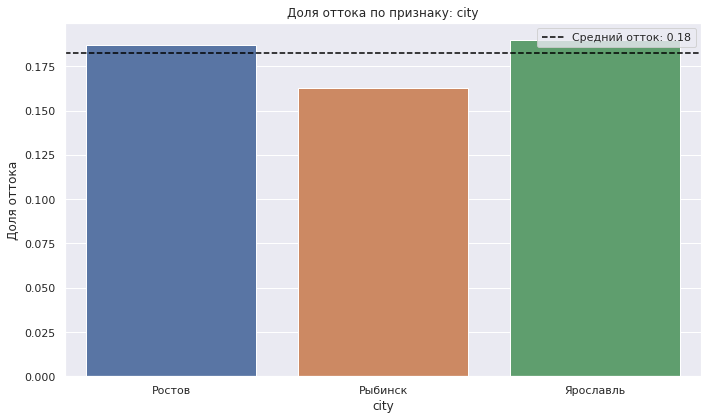

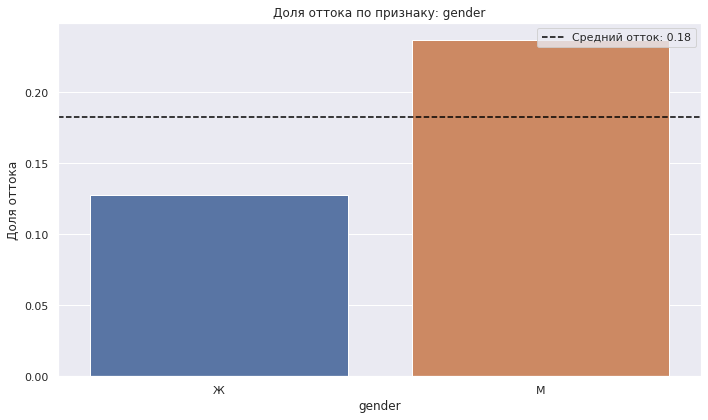

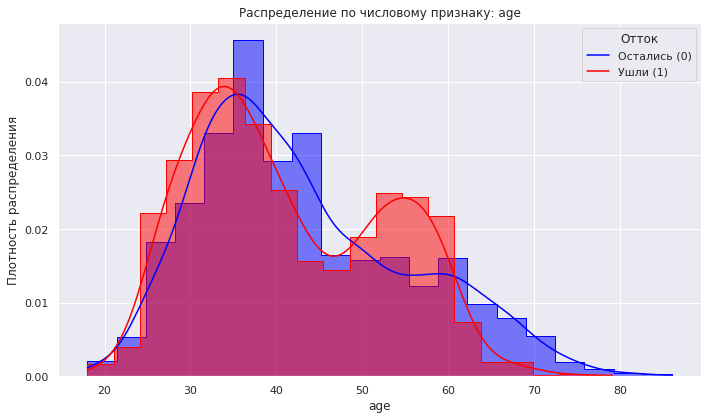

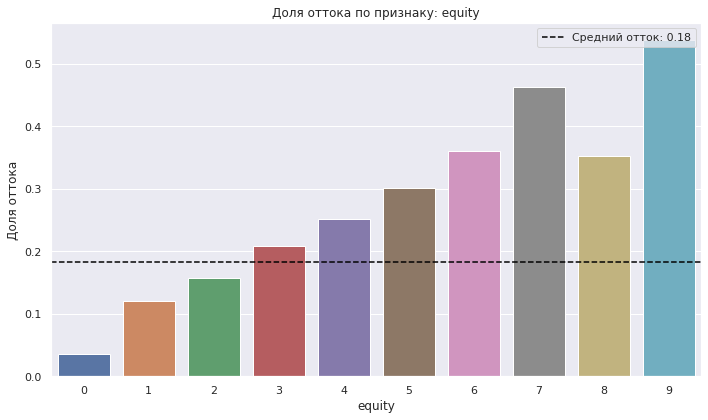

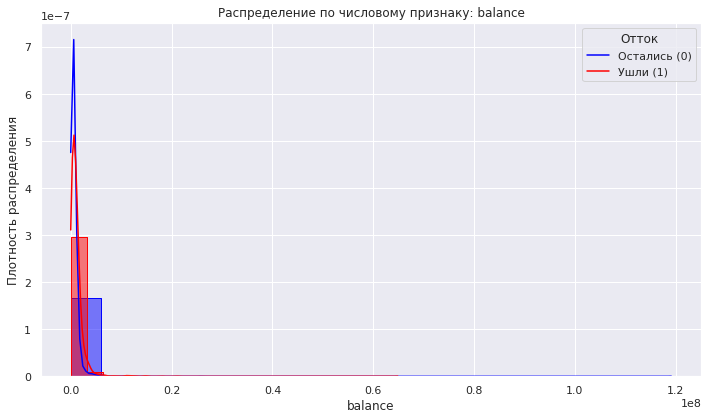

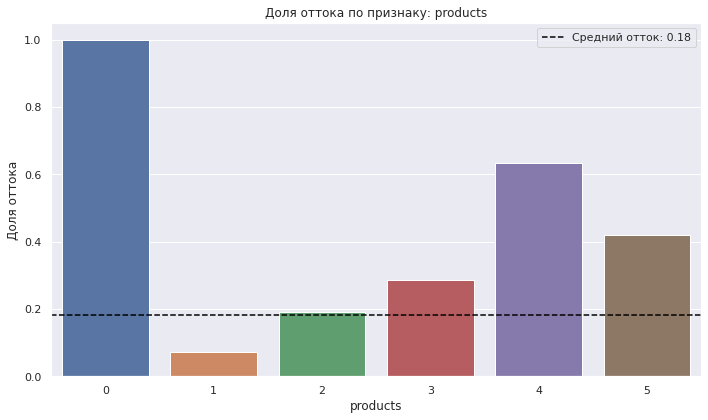

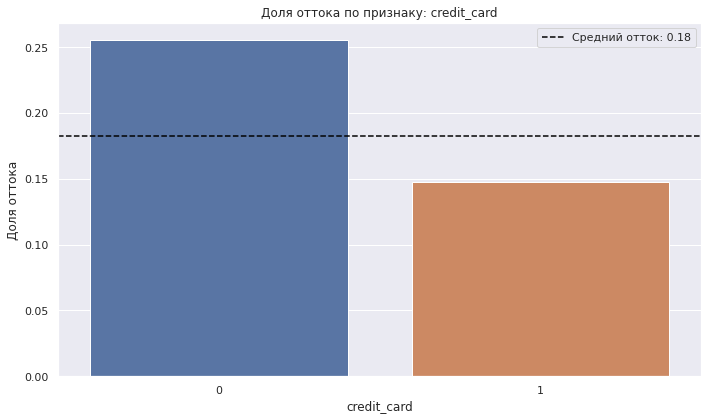

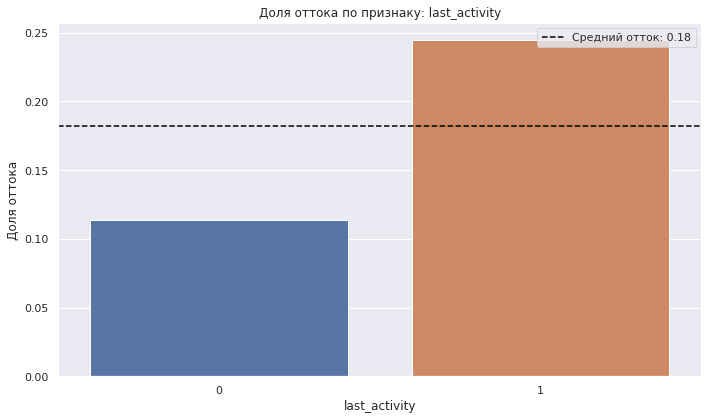

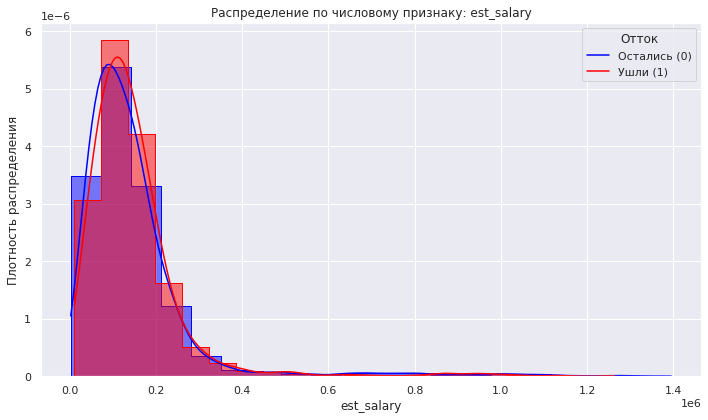

In [31]:
def plot_feature_distributions(df, group_col, bins=20, figsize=(10, 6)):
    features = df.columns[df.columns != group_col]  # Все столбцы, кроме 'churn'
    average_churn = df[group_col].mean()
    for feature in features:
        plt.figure(figsize=figsize)
        
        # Проверка на категориальный или дискретный тип данных
        if df[feature].dtype.name in ['object', 'category'] or df[feature].nunique() < 20:
            # Группируем данные по признаку и вычисляем доли оттока
            grouped = df.groupby(feature)[group_col].mean().reset_index()
            
            # Строим столбчатую диаграмму для категориальных/дискретных признаков
            sns.barplot(data=grouped, x=feature, y=group_col)
            plt.axhline(y=average_churn, color='black', linestyle='--', label=f'Средний отток: {average_churn:.2f}')
            plt.title(f'Доля оттока по признаку: {feature}')
            plt.ylabel('Доля оттока')
            plt.xticks(rotation=0)  # Поворот меток по оси X
            plt.legend(loc='upper right')
            plt.tight_layout()
        else:
            # Построение распределения для оставшихся клиентов
            sns.histplot(
                data=df.loc[df[group_col] == 0, feature],
                label='остались',
                alpha=0.5,
                stat='density',
                common_norm=False,
                element='step',
                color='blue',
                kde=True,
                bins=bins
            )
            
            # Построение распределения для ушедших клиентов
            sns.histplot(
                data=df.loc[df[group_col] == 1, feature],
                label='ушли',
                alpha=0.5,
                stat='density',
                common_norm=False,
                element='step',
                color='red',
                kde=True,
                bins=bins
            )
            
            plt.title(f'Распределение по числовому признаку: {feature}')
            plt.ylabel('Плотность распределения')
            plt.xlabel(feature)
            plt.legend(title='Отток', labels=['Остались (0)', 'Ушли (1)'])
            plt.tight_layout()
            plt.show()

plot_feature_distributions(df_kde, 'churn')

Для денежных параметров построим более показательные графики по срезам данных.

In [32]:
df_kde[['balance', 'est_salary']].describe()

,balance,est_salary
count,"7,695.00","9,974.00"
mean,"827,245.59","147,786.81"
std,"1,980,327.41","139,285.51"
min,0.00,"2,546.30"
25%,"295,698.71","75,251.66"
50%,"524,295.33","119,626.79"
75%,"980,051.21","174,499.81"
max,"119,113,552.01","1,395,064.45"


In [33]:
def plot_churn_distribution(df, column, title, xlabel, bins=30, figsize=(15, 10)):

    plt.figure(figsize=figsize)
    
    # График для оставшихся клиентов
    sns.histplot(
        data=df.query('churn == 0'),
        x=column,
        kde=True,
        alpha=0.5,
        stat='density',
        common_norm=False,
        color='blue',
        label='Остались',
        bins=bins
    )
    
    # График для ушедших клиентов
    sns.histplot(
        data=df.query('churn == 1'),
        x=column,
        kde=True,
        alpha=0.5,
        stat='density',
        common_norm=False,
        color='red',
        label='Ушли',
        bins=bins
    )
    
    # Настройка графика
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Плотность распределения')
    plt.legend(title='Отток', loc='upper right')
    plt.grid(True)
    plt.show()


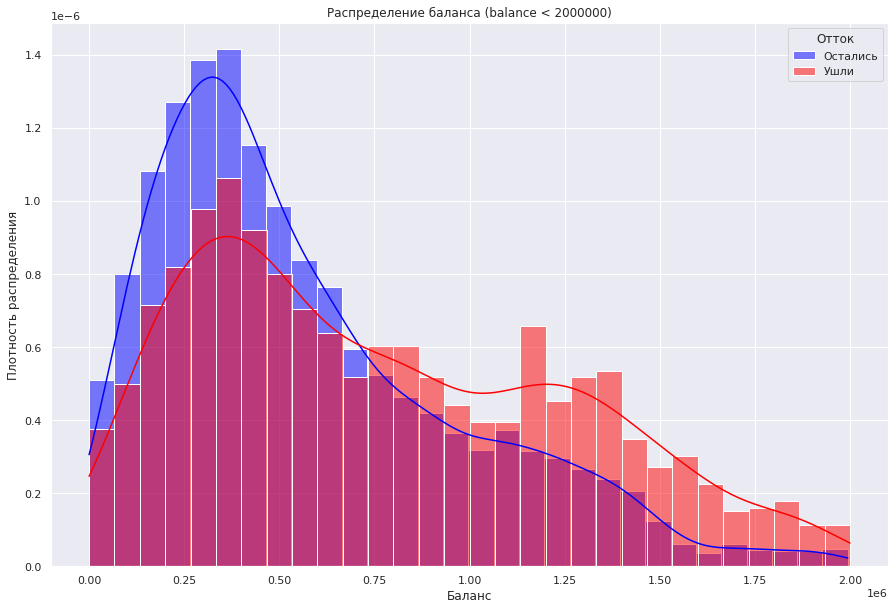

In [34]:
df_cut = df_kde.query('balance< 2000000')
plot_churn_distribution(df_cut, 'balance', 'Распределение баланса (balance < 2000000)', 'Баланс')

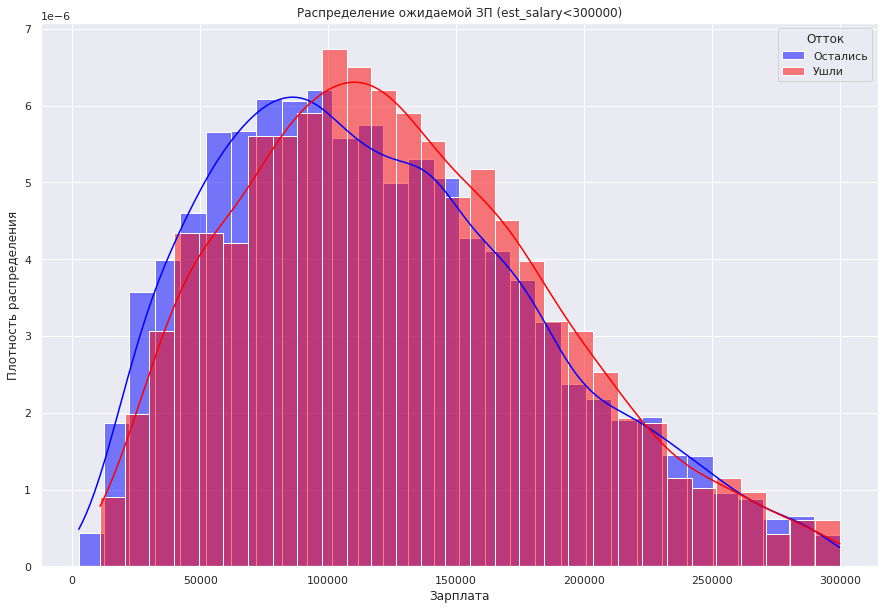

In [35]:
df_cut = df_kde.query('est_salary<300000')
plot_churn_distribution(df_cut, 'est_salary', 'Распределение ожидаемой ЗП (est_salary<300000)', 'Зарплата')

##### Промежуточный вывод по графикам распределения параметров:

- Параметр score: график плотности распределения показывает, что больше всего люде уходит с кредитным рейтингом ориентировочно от 860 до 940. До 825 с большей вероятностью клиент останется. 
- Параметр city: самая большая доля оттока в Ярославле, чуть меньше в Ростове, ориентировочно 18%
- Параметр gender: мужчины чаще уходят почти в два раза чаще, чем женщины. 
- Параметр age: график подтвердил вывод из медианных значений о том, что уходящие клиенты, немного моложе. Однако можем заметить, что в возрастном диапазоне от 48 до 61 плотность распределения уходящих клиентов выше, чем у остающихся. 
- Параметр equity: график показал, что чем больше у клиента собственности, тем более вероятно он может уйти. 
- Параметр products: если клиент пользуется более, чем двумя продуктами, вероятность  того, что он уйдет выше. При этом, если клиент использует более 3х продуктов, удержать его становится ещё сложнее. Если у клиента не осталось продуктов, то вероятность ухода 100%.
- Параметр credit_card: график показывает, что наличие кредитной карты всё же влияет на удержание клиента. Это можно объяснить не закрытыми обязательствами по кредиту, из-за чего клиент и не покидает банк. 
- Параметр last_activity: активные клиенты покидают банк чаще.
- Параметры balance и est_salary: графики показали, что чем больше у клиента зарплата или баланс, то тем вероятнее он уйдет. Уточненные графики по срезу данных более наглядно показали данную разницу. 

#### Построение корреляционных матриц

In [36]:
# Построение матрицы корреляций
interval_cols = ['score','balance','est_salary','age']

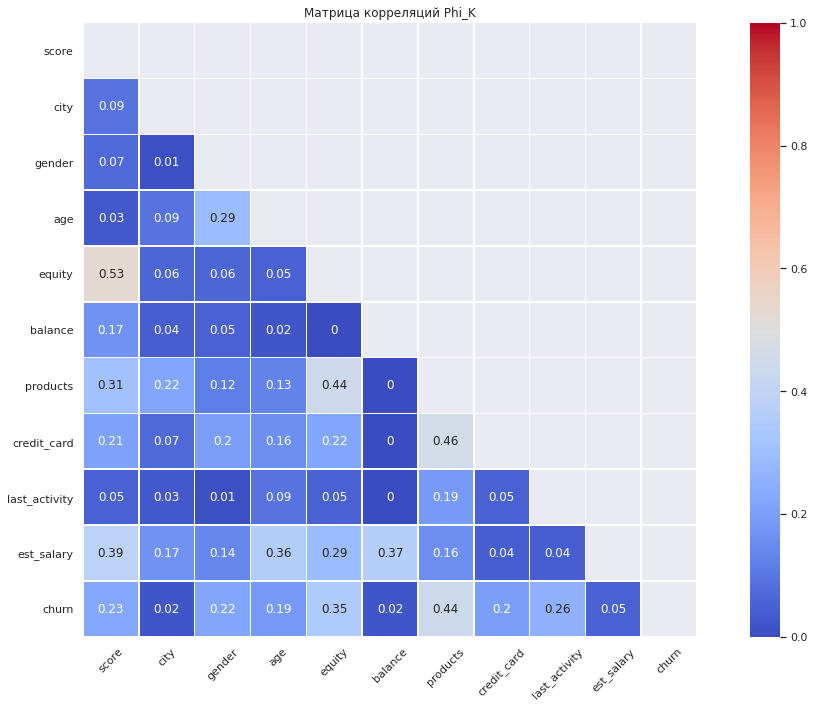

In [37]:
phik_matrix = df_kde.phik_matrix(interval_cols=interval_cols).round(2)

# Настройка тепловой карты
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))
sns.heatmap(
    phik_matrix,
    annot=True,   
    mask=mask,
    cmap="coolwarm",     
    vmin=0, vmax=1,      
    linewidths=.5,       
    square=True,         
)

plt.title('Матрица корреляций Phi_K')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.tight_layout()       
plt.show();

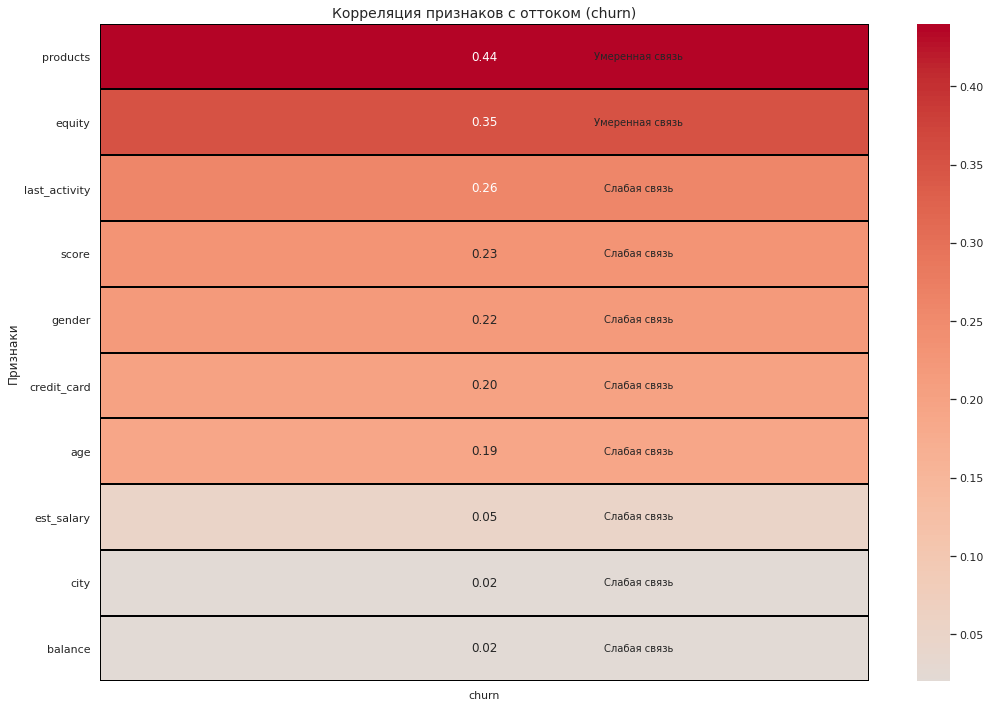

In [38]:
plt.figure(figsize=(15, 10))
phik_matrix = df_kde.phik_matrix(interval_cols=interval_cols).round(2)
churn_corr = phik_matrix.loc[:, 'churn'].drop('churn').sort_values(ascending=False)

# Создаем тепловую карту
sns.heatmap(
    churn_corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    center=0,
    linecolor='black',
    linewidths=1,
    fmt='.2f',
    annot_kws={'size': 12}  # увеличиваем размер основного текста
)

# Добавляем аннотации с интерпретацией по шкале Чеддока ниже значений
for i, v in enumerate(churn_corr):
    if v < 0.3:
        text = 'Слабая связь'
    elif 0.3 <= v < 0.5:
        text = 'Умеренная связь'
    elif 0.5 <= v < 0.7:
        text = 'Заметная связь'
    elif 0.7 <= v < 0.9:
        text = 'Высокая связь'
    else:
        text = 'Очень высокая связь'
    
    plt.text(0.7, i + 0.5, text, 
             va='center', ha='center', fontsize=10)

plt.title('Корреляция признаков с оттоком (churn)', fontsize=14)
plt.ylabel('Признаки', fontsize=12)
plt.xticks()
plt.tight_layout()
plt.show()

##### Промежуточный вывод:

Интерпретация значений по шкале Чеддока:

- 0–0,3 — слабая связь; 
- 0,3–0,5 — умеренная связь; 
- 0,5–0,7 — заметная связь; 
- 0,7–0,9 — высокая связь; 
- 0,9–1 — очень высокая связь; 
- 1 — абсолютная взаимозависимость

Результаты:

- Можем наблюдать умеренную связь между оттоком клиентов и параметрами equity и products (0.35 и 0.44).
- Для остальных параметров связь слабая. Среди них самая большая корреляция между оттоком и кредитным рейтингом(score) - 0.23 и последней активности(last_activity) - 0.26.

#### Составление портрета “ушедшего клиента”

In [39]:
# Создаем функцию для расчета портрета оттока
def churn_portrait(df):
    # Создаем пустые списки для хранения результатов
    metrics = []
    stay_values = []
    churn_values = []
    relative_diff = []

    # Непрерывные переменные с расчетом медианы
    median_cols = ['balance', 'est_salary']
    for col in median_cols:
        med_stay = df[df['churn'] == 0][col].median()
        med_churn = df[df['churn'] == 1][col].median()
        metrics.append(f'Median {col}')
        stay_values.append(med_stay)
        churn_values.append(med_churn)

    # Непрерывные переменные с расчетом среднего
    mean_cols = ['score', 'age' ]
    for col in mean_cols:
        mean_stay = df[df['churn'] == 0][col].mean()
        mean_churn = df[df['churn'] == 1][col].mean()
        metrics.append(f'Mean {col}')
        stay_values.append(mean_stay)
        churn_values.append(mean_churn)

    # Дискретные переменные
    discrete_cols = ['products', 'equity']
    for col in discrete_cols:
        med_stay = df[df['churn'] == 0][col].median()
        med_churn = df[df['churn'] == 1][col].median()
        metrics.append(f'Median {col}')
        stay_values.append(med_stay)
        churn_values.append(med_churn)

    # Категориальные переменные
    categorical_cols = ['city', 'gender', 'last_activity']
    for col in categorical_cols:
        mode_stay = df[df['churn'] == 0][col].mode()[0]
        mode_churn = df[df['churn'] == 1][col].mode()[0]
        metrics.append(f'Mode {col}')
        stay_values.append(mode_stay)
        churn_values.append(mode_churn)

    # Считаем относительную разницу для числовых значений
    for i in range(len(stay_values)):
        if isinstance(stay_values[i], (int, float)):
            diff = (churn_values[i] - stay_values[i]) / stay_values[i] * 100
            relative_diff.append(f'{diff:.2f}%')
        else:
            relative_diff.append(np.nan)

    # Создаем итоговую таблицу
    result = pd.DataFrame({
        'Метрика': metrics,
        'Остался': stay_values,
        'Ушел': churn_values,
        'Относительная разница': relative_diff
    })

    return result


portrait = churn_portrait(df)
display(portrait)

,Метрика,Остался,Ушел,Относительная разница
0,Median balance,"475,410.09","783,908.90",64.89%
1,Median est_salary,"118,227.60","125,395.22",6.06%
2,Mean score,845.40,863.42,2.13%
3,Mean age,43.02,41.45,-3.65%
4,Median products,2.00,2.00,0.00%
5,Median equity,3.00,4.00,33.33%
6,Mode city,Ярославль,Ярославль,NaN
7,Mode gender,Ж,М,NaN
8,Mode last_activity,0,1,NaN


##### Промежуточный вывод:

**Портрет лояльных клентов:**

- Баланс: 475,410.09
- Ожидаемая зарплата: 118,227.60
- Кредитный рейтинг: 845.40	
- Возраст: 43 года
- Очки собственности: 2.38
- Используемых продуктов: 2
- Город: Ярославль
- Пол: Женский
- Недавняя активность - нет.

**Портрет уходящих клиентов:**

- Баланс: 783,908.90
- Ожидаемая зарплата: 125,395.22	
- Кредитный рейтинг: 863.42
- Возраст: 41.5 года	
- Очки собственности: 3.76	
- Используемых продуктов: 2
- Город: Ярославль
- Пол: Мужской
- Недавняя активность - Да.

**Общие выводы:**

- Уходящие клиенты имеют более высокие финансовые показатели (баланс, зарплата, очки собственности).
- Уходящие клиенты в среднем на полтора-два года моложе лояльных.
- Существенное различие наблюдается по показателю собственности, что может указывать на более высокую финансовую активность уходящих клиентов.
- Гендерный фактор показывает, что мужчины более склонны к смене банка, чем женщины.
- Активные клиенты более склонны к смене банка.

#### Выводы по исследовательскому анализу

- Количество банковских продуктов (products) и наличие кредитной карты не влияют на отток клиентов
- У ушедших клиентов баланс и ожидаемая зарплата (balance и est_salary) выше, чем у тех, кто остается. 
- Ушедшие клиенты немного моложе, чем оставшиеся. 
- Кредитный рейтинг ушедших клиентов выше, чем 
- Наблюдаем интересный тренд, что клиент с большей вероятностью уходит, если был активен в последнее время.

- Параметр score: график плотности распределения показывает, что больше всего люде уходит с кредитным рейтингом ориентировочно от 860 до 890. До 825 с большей вероятностью клиент останется. 
- Параметр city: не смотря на то, что в Яврославле больше всего уходит клиентов, но и остается несравнимо больше. Наихудшая ситуация в Ростове, где количество ушедших стремится к показателем Рыбинска, однако остается клиентов в два раза меньше.
- Параметр gender: мужчины чаще уходят, чем женщины. 
- Параметр age: график подтвердил вывод из медианных значений о том, что уходящие клиенты, немного моложе. Однако можем заметить, что в возрастном диапазоне от 48 до 61 плотность распределения уходящих клиентов выше, чем у остающихся. 
- Параметр equity: график показал, что чем больше у клиента собственности, тем более вероятно он может уйти. 
- Параметр products: если клиент пользуется более, чем двумя продуктами, вероятность  того, что он уйдет выше. При этом, если клиент использует более 3х продуктов, удержать его становится ещё сложнее. 
- Параметр credit_card: график показывает, что наличие кредитной карты всё же влияет на удержание клиента. Это можно объяснить не закрытыми обязательствами по кредиту, из-за чего клиент и не покидает банк. 
- Параметр last_activity: активные клиенты покидают банк чаще.
- Параметры balance и est_salary: графики показали, что чем больше у клиента зарплата или баланс, то тем вероятнее он уйдет. Уточненные графики по срезу данных более наглядно показали данную разницу. 

Интерпретация значений по шкале Чеддока:

- 0–0,3 — слабая связь; 
- 0,3–0,5 — умеренная связь; 
- 0,5–0,7 — заметная связь; 
- 0,7–0,9 — высокая связь; 
- 0,9–1 — очень высокая связь; 
- 1 — абсолютная взаимозависимость

Результаты:

- Можем наблюдать умеренную связь между оттоком клиентов и параметрами equity и products (0.35 и 0.44).
- Для остальных параметров связь слабая. Среди них самая большая корреляция между оттоком и кредитным рейтингом(score) - 0.23 и последней активности(last_activity) - 0.26.

**Портрет лояльных клентов:**

- Баланс: 475,410.09
- Ожидаемая зарплата: 118,227.60
- Кредитный рейтинг: 845.40	
- Возраст: 43 года
- Очки собственности: 2.38
- Используемых продуктов: 2
- Город: Ярославль
- Пол: Женский
- Недавняя активность - нет.

**Портрет уходящих клиентов:**

- Баланс: 783,908.90
- Ожидаемая зарплата: 125,395.22	
- Кредитный рейтинг: 863.42
- Возраст: 41.5 года	
- Очки собственности: 3.76	
- Используемых продуктов: 2
- Город: Ярославль
- Пол: Мужской
- Недавняя активность - Да.

**Общие выводы:**

- Уходящие клиенты имеют более высокие финансовые показатели (баланс, зарплата, очки собственности).
- Уходящие клиенты в среднем на полтора-два года моложе лояльных.
- Существенное различие наблюдается по показателю собственности, что может указывать на более высокую финансовую активность уходящих клиентов.
- Гендерный фактор показывает, что мужчины более склонны к смене банка, чем женщины.
- Активные клиенты более склонны к смене банка.

##### Обобщенные результаты

**Финансовые показатели являются ключевыми факторами оттока:**

- Клиенты с более высоким балансом на счетах (783,908.90 против 475,410.09)
- Клиенты с более высокой ожидаемой зарплатой (125,395.22 против 118,227.60)
- Более высокий уровень собственности говорит о том, что клиент вероятнее покинет банк.

**Демографические характеристики также влияют на отток:**

- Более молодой средний возраст (41.5 против 43 лет)
- Мужчины демонстрируют более высокую склонность к смене банка
- Особая активность в возрасте 48-61 лет

**Поведенческие факторы:**

- Активные клиенты чаще покидают банк
- Наличие кредитной карты оказывает сдерживающий эффект
- Использование более 2-3 банковских продуктов увеличивает вероятность оттока

**Географический аспект:**

- Ярославль демонстрирует наибольший абсолютный отток, но и наибольшую базу клиентов
- Критическая ситуация в Ростове с относительно низким количеством оставшихся клиентов

**Корреляционный анализ показывает:**

- Умеренная связь между оттоком и показателями собственности (0.35)
- Умеренная связь с количеством используемых продуктов (0.44)
- Слабая, но значимая связь с активностью (0.26) и кредитным рейтингом (0.23)

**Профиль клиента в зоне риска:**

- Высокий уровень благосостояния
- Молодой возраст
- Мужчина
- Высокая финансовая активность
- Кредитный рейтинг 860-900
- Использование нескольких банковских продуктов

### Проверка гипотез

При проверке гипотез проверим, подходит ли тест Стьюдента, если нет, то используем тест Манна-Уитни.

- Проверка нормальности распределения (QQ-графики, тест Шапиро-Уилка)
- Проверка равенства дисперсий (тест Левена)
- Анализ выбросов

#### Гипотеза о кредитном рейтинге
H0: Отток между клиентами с кредитным рейтингом 860-930 и остальными клиентами - равный.

H1: Отток между клиентами с кредитным рейтингом 860-930 и остальными клиентами - различен.


In [40]:
def test_credit_score_churn(df):
    # Фильтруем интересующий диапазон и остальные данные
    target_group = df[(df['score'] >= 860) & (df['score'] <= 930)]
    other_group = df[~((df['score'] >= 860) & (df['score'] <= 930))]
       
    # Проверяем наличие выбросов через IQR для числового score
    q1_target = target_group['score'].quantile(0.25)
    q3_target = target_group['score'].quantile(0.75)
    iqr_target = q3_target - q1_target
    lower_bound_target = q1_target - 1.5 * iqr_target
    upper_bound_target = q3_target + 1.5 * iqr_target
    
    q1_other = other_group['score'].quantile(0.25)
    q3_other = other_group['score'].quantile(0.75)
    iqr_other = q3_other - q1_other
    lower_bound_other = q1_other - 1.5 * iqr_other
    upper_bound_other = q3_other + 1.5 * iqr_other
    
    # Подсчитываем количество выбросов
    outliers_target = ((target_group['score'] < lower_bound_target) | 
                      (target_group['score'] > upper_bound_target)).sum()
    
    outliers_other = ((other_group['score'] < lower_bound_other) | 
                      (other_group['score'] > upper_bound_other)).sum()
    
    # Выбираем тест на основе количества выбросов
    if (outliers_target + outliers_other) > 0.05 * len(df):  # Если более 5% выбросов
        u_stat, p_value = mannwhitneyu(target_group['churn'], other_group['churn'], alternative='two-sided')
        test_name = "тест Манна-Уитни"
        stat = u_stat
    else:
        # Используем тест с поправкой Уэлча
        t_stat, p_value = ttest_ind(target_group['churn'], other_group['churn'], equal_var=False)
        test_name = "t-тест с поправкой Уэлча"
        stat = t_stat
    
    # Анализ оттока в диапазоне
    churn_group = target_group[target_group['churn'] == 1]
    stay_group = target_group[target_group['churn'] == 0]
    range_churn_rate = len(churn_group) / (len(churn_group) + len(stay_group))
    overall_churn_rate = len(df[df['churn'] == 1]) / len(df)
    
    # Форматируем вывод
    print("Проверка гипотез:")
    print(f"p-value: {p_value:.4f}")
    print(f"Используемый тест: {test_name}")
    
    print(f"\nАнализ диапазона кредитного рейтинга 860-930:")
    print(f"Процент оттока в диапазоне: {range_churn_rate:.2%}")
    print(f"Общий процент оттока по всей выборке: {overall_churn_rate:.2%}")
    
    if p_value < 0.05:
        print('Отклоняем нулевую гипотезу в пользу H1')
    else:
        print('Не можем отклонить нулевую гипотезу')

test_credit_score_churn(df_kde)

Проверка гипотез:
p-value: 0.0000
Используемый тест: тест Манна-Уитни

Анализ диапазона кредитного рейтинга 860-930:
Процент оттока в диапазоне: 23.18%
Общий процент оттока по всей выборке: 18.24%
Отклоняем нулевую гипотезу в пользу H1


**Вывод:** принимаем H1: Отток между клиентами с кредитным рейтингом 860-890 и остальными клиентами - различен.

####  Гипотеза о финансовые показателях

H0: Средняя зарплата утекающих и остающихся клиентов одинакова.

H1: Средняя зарплата утекающих и остающихся клиентов различается.

In [41]:
def test_salary_churn(df):
    # Разделяем данные на две группы
    churn_group = df[df['churn'] == 1]['est_salary']
    stay_group = df[df['churn'] == 0]['est_salary']
    
    # Проверяем на пустые выборки
    if len(churn_group) == 0 or len(stay_group) == 0:
        raise ValueError("Одна из групп пуста")
    
    # Определяем выбросы через IQR
    def get_outliers(group):
        q1 = group.quantile(0.25)
        q3 = group.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return ((group < lower_bound) | (group > upper_bound)).sum()
    
    outliers_churn = get_outliers(churn_group)
    outliers_stay = get_outliers(stay_group)
    
    # Выбираем тест на основе количества выбросов
    if (outliers_churn + outliers_stay) > 0.05 * (len(churn_group) + len(stay_group)):
        # Используем непараметрический тест
        stat, p_value = mannwhitneyu(churn_group, stay_group)
        test_name = "U-критерий Манна-Уитни"
    else:
        # Используем параметрический тест с поправкой Уэлча
        stat, p_value = ttest_ind(churn_group, stay_group, equal_var=False)
        test_name = "t-тест с поправкой Уэлча"
    
    # Рассчитываем медианные зарплаты
    median_churn = churn_group.median()
    median_stay = stay_group.median()
    
    # Форматируем вывод
    print("Медианные зарплаты клиентов:")
    print(f"Медианная зарплата утекающих клиентов: {median_churn:.2f}")
    print(f"Медианная зарплата остающихся клиентов: {median_stay:.2f}")
    print("\nПроверка гипотез:")
    print(f"p-value: {p_value:.4f}")
    print(f"Используемый тест: {test_name}")
    
    if p_value < 0.05:
        print('Отклоняем нулевую гипотезу в пользу H1')
    else:
        print('Не можем отклонить нулевую гипотезу')

test_salary_churn(df)

Медианные зарплаты клиентов:
Медианная зарплата утекающих клиентов: 125395.22
Медианная зарплата остающихся клиентов: 118227.60

Проверка гипотез:
p-value: 0.8516
Используемый тест: t-тест с поправкой Уэлча
Не можем отклонить нулевую гипотезу


**Вывод:** принимаем H0: Средняя зарплата утекающих и остающихся клиентов - одинакова.

### Промежуточные итоги:



**Ключевые факторы оттока:**

Финансовые показатели:

- Высокий баланс на счетах (783,908.90 против 475,410.09)
- Высокая ожидаемая зарплата (125,395.22 против 118,227.60)
- Высокий уровень собственности (3.76 против 2.38)

Демографические характеристики:

- Более молодой возраст (41.5 против 43 лет)
- Преобладание мужчин среди уходящих
- Повышенная склонность к оттоку в возрасте 48-61 лет

Поведенческие факторы:

- Высокая активность клиентов
- Использование более 2-3 банковских продуктов
- Критический диапазон кредитного рейтинга 860-930

Географический аспект:

- Ярославль - наибольший абсолютный отток при большой базе
- Непростая ситуация в Ростове в долевых показателях

Корреляционный анализ:

- Умеренная связь (0.44) с количеством используемых продуктов
- Умеренная связь (0.35) с уровнем собственности
- Слабая, но значимая связь (0.26) с активностью
- Слабая связь (0.23) с кредитным рейтингом

Профиль клиента в зоне риска:

- Высокий уровень благосостояния
- Молодой возраст
- Мужской пол
- Высокая финансовая активность
- Кредитный рейтинг 860-900
- Использование нескольких банковских продуктов

Выводы по гипотезам:

- Подтвердилась гипотеза о связи между кредитным рейтингом 860-930 и повышенным оттоком
- Подтвердилась гипотеза о равенстве средней зарплаты между утекающими и остающимися клиентами

**На основе полученных результатов веделим следующие параметры для сегментации:**

- Кредитный рейтинг более 860 - 930 score
- Зарплата более 125,000 - est_salary
- Баланс на счете более 600,000 - balance
- Возраст: 24 - 43 лет - age
- Пол - мужкой - gender
- Наличие недавней активности


### Сегментация

In [42]:
# Функция для расчета статистики сегмента
def calculate_segment_stats(segment):
    total_clients = segment['churn'].count()
    churn_count = segment['churn'].sum()
    churn_rate = (churn_count / total_clients) * 100
    stats = pd.DataFrame({
        'Показатель': ['Общее количество', 'Количество ушедших', 'Процент оттока'],
        'Значение': [total_clients, churn_count, f'{churn_rate:.2f}%']
    })
    stats.reset_index(drop=True, inplace=True)
    return stats

# Сегмент 1: Высокодоходные клиенты без кредитной карты
seg_1 = df_kde.query('est_salary > 125000 & credit_card == 0 & 930 >= score >= 860')
seg_1_stats = calculate_segment_stats(seg_1)
print("\nСегмент 1: Высокодоходные клиенты без кредитной карты")
display(seg_1_stats)

# Сегмент 2: Молодые состоятельные мужчины
seg_2 = df_kde.query('24 <= age <= 43 & gender == "М" & balance > 600000')
seg_2_stats = calculate_segment_stats(seg_2)
print("\nСегмент 2: Молодые состоятельные мужчины")
display(seg_2_stats)

# Сегмент 3: Клиенты с высоким балансом и кредитным рейтингом, но низкой активностью
seg_3 = df_kde.query('balance > 600000 & last_activity == 0 & 930 >= score >= 860')
seg_3_stats = calculate_segment_stats(seg_3)
print("\nСегмент 3: Клиенты с высоким балансом и кредитным рейтингом, но низкой активностью")
display(seg_3_stats)


Сегмент 1: Высокодоходные клиенты без кредитной карты


,Показатель,Значение
0,Общее количество,735
1,Количество ушедших,289
2,Процент оттока,39.32%



Сегмент 2: Молодые состоятельные мужчины


,Показатель,Значение
0,Общее количество,1027
1,Количество ушедших,441
2,Процент оттока,42.94%



Сегмент 3: Клиенты с высоким балансом и кредитным рейтингом, но низкой активностью


,Показатель,Значение
0,Общее количество,745
1,Количество ушедших,148
2,Процент оттока,19.87%


#### Приоритезация работы с сегментами

Из-за нехватри ресурсов приоритезируем сегменты согласно оттоку, учитывая потенциальную нагрузку, которая возникнет при работе над сегментом. 

Расчет будем произвадить исходя из формулы:
priority = (size_score * size_weight) + (churn_score * churn_weight)

Для приоритезации введём коэффициэнт показателей. 

коэф размера сегмента: size_weight = 0.4
коэф оттока в сегменте: churn_weight = 0.6


In [43]:
segments = {
    'Сегмент 1': {
        'размер': int(seg_1_stats[seg_1_stats['Показатель'] == 'Общее количество']['Значение']),
        'отток': float(seg_1_stats[seg_1_stats['Показатель'] == 'Процент оттока']['Значение'].str.replace('%', ''))
    },
    'Сегмент 2': {
        'размер': int(seg_2_stats[seg_2_stats['Показатель'] == 'Общее количество']['Значение']),
        'отток': float(seg_2_stats[seg_2_stats['Показатель'] == 'Процент оттока']['Значение'].str.replace('%', ''))
    },
    'Сегмент 3': {
        'размер': int(seg_3_stats[seg_3_stats['Показатель'] == 'Общее количество']['Значение']),
        'отток': float(seg_3_stats[seg_3_stats['Показатель'] == 'Процент оттока']['Значение'].str.replace('%', ''))
    }
}

In [44]:
# Функция расчета приоритета
def calculate_priority(segment):
    # Определяем максимальные значения
    max_size = max(s['размер'] for s in segments.values())
    max_churn = max(s['отток'] for s in segments.values())
    
    # Рассчитываем показатели
    size_score = segment['размер'] / max_size
    churn_score =(segment['отток'] / 100)
    
    # Веса показателей
    size_weight = 0.4
    churn_weight = 0.6
    
    # Итоговый приоритет
    priority = (size_score * size_weight) + (churn_score * churn_weight)
    return priority

# Расчет приоритетов
priorities = {}
for segment, data in segments.items():
    priorities[segment] = calculate_priority(data)

# Выводим результаты
print("Результаты расчета приоритетов:")
for segment, priority in priorities.items():
    print(f"{segment}: {priority:.2f}")

Результаты расчета приоритетов:
Сегмент 1: 0.52
Сегмент 2: 0.66
Сегмент 3: 0.41


**Вывод**: 

Полученные приоритеты:

- Сегмент 2: 0.66
- Сегмент 1: 0.52
- Сегмент 3: 0.41

Приоритезация сегментов показывает, что наибольшую важность представляет Сегмент 2 (Молодые состоятельные мужчины) с приоритетным показателем 0.66. Это обусловлено: крупнейшим размером сегмента (1027 клиентов), высоким процентом оттока (42.94%)

Сегмент 1 (Высокодоходные клиенты без кредитной карты) занимает второе место с показателем 0.52. Несмотря на меньший размер (735 клиентов), высокий отток (39.32%) делает его приоритетным для удержания.

Сегмент 3 (Клиенты с высоким балансом и кредитным рейтингом, но низкой активностью) имеет наименьший приоритет (0.41). Необходимо сфокусироваться на поддержании текущих условий и поэтапному ввседению новых функций, желательно, не требующих высокой активности от клиента.



## Выводы и рекомендации

**Предобработка данных:**

- Наименования столбцов датасета приведены к нижнему регистру, параметр user_id приведен к более читаемому формату.
- Проверены параметры пропусков на тип пропусков. 
- Удалены пропуски в параметре age, в параметре balance - оставили без изменений, тк тип пропуска MNAR.
- Явные дубликаты не обнаружены. 
- Обнаружены неявные дубликаты по параметру user_id, данные дубликаты не обрабатывались, тк могут быть особенностью заполнения внутренней системы и могут обозначають разных людей. 
- Обнаружены аномальные значения, но на данном этапе не обрабатывались, при необходимости будут отсортированы по ходу исследования. 

**Исследовательский анализ:**

- Количество банковских продуктов (products) и наличие кредитной карты не влияют на отток клиентов
- У ушедших клиентов баланс и ожидаемая зарплата (balance и est_salary) выше, чем у тех, кто остается. 
- Ушедшие клиенты немного моложе, чем оставшиеся. 
- Кредитный рейтинг ушедших клиентов выше, чем 
- Наблюдаем интересный тренд, что клиент с большей вероятностью уходит, если был активен в последнее время.

- Параметр score: график плотности распределения показывает, что больше всего люде уходит с кредитным рейтингом ориентировочно от 860 до 890. До 825 с большей вероятностью клиент останется. 
- Параметр city: не смотря на то, что в Яврославле больше всего уходит клиентов, но и остается несравнимо больше. Наихудшая ситуация в Ростове, где количество ушедших стремится к показателем Рыбинска, однако остается клиентов в два раза меньше.
- Параметр gender: мужчины чаще уходят, чем женщины. 
- Параметр age: график подтвердил вывод из медианных значений о том, что уходящие клиенты, немного моложе. Однако можем заметить, что в возрастном диапазоне от 48 до 61 плотность распределения уходящих клиентов выше, чем у остающихся. 
- Параметр equity: график показал, что чем больше у клиента собственности, тем более вероятно он может уйти. 
- Параметр products: если клиент пользуется более, чем двумя продуктами, вероятность  того, что он уйдет выше. При этом, если клиент использует более 3х продуктов, удержать его становится ещё сложнее. 
- Параметр credit_card: график показывает, что наличие кредитной карты всё же влияет на удержание клиента. Это можно объяснить не закрытыми обязательствами по кредиту, из-за чего клиент и не покидает банк. 
- Параметр last_activity: активные клиенты покидают банк чаще.
- Параметры balance и est_salary: графики показали, что чем больше у клиента зарплата или баланс, то тем вероятнее он уйдет. Уточненные графики по срезу данных более наглядно показали данную разницу. 

Интерпретация значений по шкале Чеддока:

- 0–0,3 — слабая связь; 
- 0,3–0,5 — умеренная связь; 
- 0,5–0,7 — заметная связь; 
- 0,7–0,9 — высокая связь; 
- 0,9–1 — очень высокая связь; 
- 1 — абсолютная взаимозависимость

Результаты:

- Можем наблюдать умеренную связь между оттоком клиентов и параметрами equity и products (0.35 и 0.44).
- Для остальных параметров связь слабая. Среди них самая большая корреляция между оттоком и кредитным рейтингом(score) - 0.23 и последней активности(last_activity) - 0.26.

**Портрет лояльных клентов:**

- Баланс: 475,410.09
- Ожидаемая зарплата: 118,227.60
- Кредитный рейтинг: 845.40	
- Возраст: 43 года
- Очки собственности: 2.38
- Используемых продуктов: 2
- Город: Ярославль
- Пол: Женский

**Портрет уходящих клиентов:**

- Баланс: 783,908.90
- Ожидаемая зарплата: 125,395.22	
- Кредитный рейтинг: 863.42
- Возраст: 41.5 года	
- Очки собственности: 3.76	
- Используемых продуктов: 2
- Город: Ярославль
- Пол: Мужской

**Общие выводы:**

- Уходящие клиенты имеют более высокие финансовые показатели (баланс, зарплата, очки собственности).
- Уходящие клиенты в среднем на полтора-два года моложе лояльных.
- Существенное различие наблюдается по показателю собственности, что может указывать на более высокую финансовую активность уходящих клиентов.
- Гендерный фактор показывает, что мужчины более склонны к смене банка, чем женщины.

**Ключевые факторы оттока:**

Финансовые показатели:

- Высокий баланс на счетах (783,908.90 против 475,410.09)
- Высокая ожидаемая зарплата (125,395.22 против 118,227.60)
- Высокий уровень собственности (3.76 против 2.38)

Демографические характеристики:

- Более молодой возраст (41.5 против 43 лет)
- Преобладание мужчин среди уходящих
- Повышенная склонность к оттоку в возрасте 24-43 лет

Поведенческие факторы:

- Высокая активность клиентов
- Использование более 2-3 банковских продуктов
- Критический диапазон кредитного рейтинга 860-930

Географический аспект:

- Ярославль и Ростов - наибольшая доля оттока клиентов

Корреляционный анализ:

- Умеренная связь (0.44) с количеством используемых продуктов
- Умеренная связь (0.35) с уровнем собственности
- Слабая, но значимая связь (0.26) с активностью
- Слабая связь (0.23) с кредитным рейтингом

Профиль клиента в зоне риска:

- Высокий уровень благосостояния
- Молодой возраст
- Мужской пол
- Высокая финансовая активность
- Кредитный рейтинг 860-930
- Использование нескольких банковских продуктов
- Активный клиент

Выводы по гипотезам:

- Подтвердилась гипотеза о связи между кредитным рейтингом 860-930 и повышенным оттоком
- Подтвердилась гипотеза о равенстве средней зарплаты между утекающими и остающимися клиентами

**На основе полученных результатов веделили следующие параметры для сегментации:**

- Кредитный рейтинг 860 - 930 - score
- Зарплата более 125,000 - est_salary
- Баланс на счете более 600,000 - balance
- Возраст 24 - 43 лет - age
- Пол - мужкой - gender
- Наличие недавней активности

**Сегментация и приоритезация**

Полученные приоритеты:

- Сегмент 2: 0.66
- Сегмент 1: 0.52
- Сегмент 3: 0.41

Приоритезация сегментов показывает, что наибольшую важность представляет Сегмент 2 (Молодые состоятельные мужчины) с приоритетным показателем 0.66. Это обусловлено: крупнейшим размером сегмента (1027 клиентов), высоким процентом оттока (42.94%)

Сегмент 1 (Высокодоходные клиенты без кредитной карты) занимает второе место с показателем 0.52. Несмотря на меньший размер (735 клиентов), высокий отток (39.32%) делает его приоритетным для удержания.

Сегмент 3 (Клиенты с высоким балансом и кредитным рейтингом, но низкой активностью) имеет наименьший приоритет (0.41). Необходимо сфокусироваться на поддержании текущих условий и поэтапному ввседению новых функций, желательно, не требующих высокой активности от клиента.





###  Итоги

**В ходе исследования выявлены ключевые факторы оттока клиентов:**

Финансовые показатели: клиенты с высоким балансом (783,908.90), зарплатой (125,395.22) и уровнем собственности (3.76) более склонны к уходу
Демографические характеристики: уходящие клиенты моложе (41.5 лет), преимущественно мужчины, особенно в возрасте 48-61 лет
Поведенческие факторы: высокая активность и использование более 2-3 банковских продуктов увеличивают риск оттока
Кредитный рейтинг: критический диапазон 860-930 существенно влияет на вероятность ухода
Корреляционный анализ показал умеренную связь с количеством используемых продуктов (0.44) и уровнем собственности (0.35), а также слабую, но значимую связь с активностью (0.26) и кредитным рейтингом (0.23).

Портрет клиента в зоне риска: молодой мужчина с высоким уровнем благосостояния, активной финансовой деятельностью, кредитным рейтингом 860-930 и несколькими банковскими продуктами.
Наибольший отток наблюдается в Ярославле и Ростове.

**Рекомендации по сегментам:**

Сегмент 2: Молодые состоятельные мужчины (приоритет 0.66):

Рекомендации:

- Разработка персонализированных финансовых решений
- Модернизация digital-сервисов и мобильного приложения
- Создание премиального клуба с особыми условиями
- Запуск программы персонального менеджмента
- Организация регулярных нетворкинг-мероприятий
- Внедрение системы персонального финансового планирования
- Разработка гибких условий обслуживания
- Создание программы реферерального вознаграждения
- Запуск программы повышения финансовой грамотности

Сегмент 1: Высокодоходные клиенты без кредитной карты (приоритет 0.52):

- Разработка специальных кредитных предложений
- Внедрение пробных периодов премиальных кар
- Внедрение системы бонусов за активность
- Создание программы автоматического рефинансирования

Сегмент 3: Клиенты с высоким балансом и кредитным рейтингом, но низкой активностью (приоритет 0.41):

- Внедрение системы автоматизации процессов
- Создание программ пассивного дохода
- Запуск системы уведомлений о выгодных предложениях
- Разработка программы страхования активов
- Внедрение системы автоматического управления финансами
- Запуск программы премиального обслуживания

**Рекомендуемые шаги:** 

- Поэтапное внедрение с фокусом на Сегмент 2 как наиболее проблемный
- Мониторинг результатов после каждого этапа для корректировки подхода
- По возможности, собрать данные по трудозатратам сотрудников для каждого сегмента для корректировки анализа
- Оптимизация затрат с учетом ROI по каждому сегменту

**Ключевые параметры для отслеживания:**

- Уровень активности клиентов после внедрения изменений
- Динамика оттока в каждом сегменте
- Экономическая эффективность программ удержания
- Обратная связь от клиентов по внедренным изменениям

## Ссылка на презентацию: https://disk.yandex.ru/i/40FDS7H2FDy8Nw